<h1>Lab | Cleaning categorical data</h1>

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder. In this lab we will explore categorical data.

<h2>Instructions</h2>

1. Import the necessary libraries if you are starting a new notebook. Using the same data as the previous lab: we_fn_use_c_marketing_customer_value_analysis.csv

2. Find all of the categorical data. Save it in a categorical_df variable.

3. Check for NaN values.

4. Check all unique values of columns.

5. Check dtypes. Do they all make sense as categorical data?

6. Does any column contain alpha and numeric data? Decide how to clean it.

7. Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions.

8. Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

9. Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

In [1]:
# 1. Import the necessary libraries if you are starting a new notebook.
# Using the same data as the previous lab: we_fn_use_c_marketing_customer_value_analysis.csv

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
# 2. Find all of the categorical data. Save it in a categorical_df variable.

In [5]:
categorical_df = customer_df.select_dtypes(object)
categorical_df.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [6]:
categorical_df.shape

(9134, 16)

In [7]:
# 3.Check for NaN values.

In [8]:
categorical_df.isna().sum()

Customer             0
State                0
Response             0
Coverage             0
Education            0
Effective To Date    0
EmploymentStatus     0
Gender               0
Location Code        0
Marital Status       0
Policy Type          0
Policy               0
Renew Offer Type     0
Sales Channel        0
Vehicle Class        0
Vehicle Size         0
dtype: int64

In [9]:
# There are no NaN values in this dataset

In [10]:
# 4. Check all unique values of columns.

In [11]:
for column in categorical_df.columns:
    display(column, categorical_df[column].unique())

'Customer'

array(['BU79786', 'QZ44356', 'AI49188', ..., 'TD14365', 'UP19263',
       'Y167826'], dtype=object)

'State'

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
      dtype=object)

'Response'

array(['No', 'Yes'], dtype=object)

'Coverage'

array(['Basic', 'Extended', 'Premium'], dtype=object)

'Education'

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

'Effective To Date'

array(['2/24/11', '1/31/11', '2/19/11', '1/20/11', '2/3/11', '1/25/11',
       '1/18/11', '1/26/11', '2/17/11', '2/21/11', '1/6/11', '2/6/11',
       '1/10/11', '1/17/11', '1/5/11', '2/27/11', '1/14/11', '1/21/11',
       '2/5/11', '1/29/11', '2/28/11', '2/12/11', '2/2/11', '2/7/11',
       '1/22/11', '2/13/11', '1/15/11', '1/8/11', '1/11/11', '1/28/11',
       '2/8/11', '2/23/11', '1/2/11', '2/16/11', '1/27/11', '1/23/11',
       '1/9/11', '2/11/11', '2/4/11', '2/1/11', '2/15/11', '2/26/11',
       '1/16/11', '1/1/11', '2/10/11', '1/24/11', '2/25/11', '1/12/11',
       '2/9/11', '1/19/11', '1/4/11', '2/14/11', '2/20/11', '2/18/11',
       '1/3/11', '1/13/11', '1/30/11', '2/22/11', '1/7/11'], dtype=object)

'EmploymentStatus'

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

'Gender'

array(['F', 'M'], dtype=object)

'Location Code'

array(['Suburban', 'Rural', 'Urban'], dtype=object)

'Marital Status'

array(['Married', 'Single', 'Divorced'], dtype=object)

'Policy Type'

array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object)

'Policy'

array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
       'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
       'Special L3'], dtype=object)

'Renew Offer Type'

array(['Offer1', 'Offer3', 'Offer2', 'Offer4'], dtype=object)

'Sales Channel'

array(['Agent', 'Call Center', 'Web', 'Branch'], dtype=object)

'Vehicle Class'

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury SUV', 'Sports Car',
       'Luxury Car'], dtype=object)

'Vehicle Size'

array(['Medsize', 'Small', 'Large'], dtype=object)

In [12]:
# 5. Check dtypes. Do they all make sense as categorical data?

In [13]:
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer           9134 non-null   object
 1   State              9134 non-null   object
 2   Response           9134 non-null   object
 3   Coverage           9134 non-null   object
 4   Education          9134 non-null   object
 5   Effective To Date  9134 non-null   object
 6   EmploymentStatus   9134 non-null   object
 7   Gender             9134 non-null   object
 8   Location Code      9134 non-null   object
 9   Marital Status     9134 non-null   object
 10  Policy Type        9134 non-null   object
 11  Policy             9134 non-null   object
 12  Renew Offer Type   9134 non-null   object
 13  Sales Channel      9134 non-null   object
 14  Vehicle Class      9134 non-null   object
 15  Vehicle Size       9134 non-null   object
dtypes: object(16)
memory usage: 1.1+ MB


All columns have data type 'object', which is usually string and it makes sence for all the columns except 'Effective To Date', which should be datetime.

In [14]:
customer_df['Effective To Date'] = pd.to_datetime(customer_df['Effective To Date'])
categorical_df = customer_df.select_dtypes(object)
categorical_df.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [15]:
# 6. Does any column contain alpha and numeric data? Decide how to clean it.

These columns contain numeric data: 'Customer', 'Policy', 'Renew Offer Type'.
Not sure we need to change anything there though. 

- Column 'Customer' contains a unique customer id, which we can drop / use to find useful information about a particular group of customers later.
- Column 'Policy' contains 3 levels of 3 different types of policies, so no need to change anything there too.
- Column 'Renew Offer Type' contains 4 different types of offers, which is make sense too (we can change the data type to numerical and change the values to 1,2,3,4, but I think it makes more sense to keep it as a category of the offer, not a number).

In [16]:
# 7. Would you choose to do anything else to clean or wrangle the categorical data?
# Comment your decisions.

We don't have any NaN values to fill or weird values to replace, so I'm not sure we need to do anything else here.

In [17]:
# 8. Compare policy_type and policy. What information is contained in these columns.
# Can you identify what is important?

In [18]:
customer_df['Policy Type'].unique()

array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object)

In [19]:
customer_df['Policy'].unique()

array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
       'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
       'Special L3'], dtype=object)

It seems like we have 'Corporate', 'Personal' and 'Special' types of policy in both columns, so we can leave only numbers in column 'Policy'.

In [20]:
customer_df['Policy'] = customer_df['Policy'].replace({'Corporate L3': 3, 
                                                       'Personal L3': 3,
                                                       'Corporate L2': 2,
                                                       'Personal L1': 1,
                                                       'Special L2': 2,
                                                       'Corporate L1': 1, 
                                                       'Personal L2': 2,
                                                       'Special L1': 1,
                                                       'Special L3': 3})
customer_df['Policy'].unique()

array([3, 2, 1])

In [21]:
categorical_df = customer_df.select_dtypes(object)
categorical_df.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class',
       'Vehicle Size'],
      dtype='object')

In [22]:
# 9. Check number of unique values in each column, can they be combined in any way to ease encoding?
# Comment your thoughts and make those changes.

In [23]:
categorical_df.nunique()

Customer            9134
State                  5
Response               2
Coverage               3
Education              5
EmploymentStatus       5
Gender                 2
Location Code          3
Marital Status         3
Policy Type            3
Renew Offer Type       4
Sales Channel          4
Vehicle Class          6
Vehicle Size           3
dtype: int64

<AxesSubplot:>

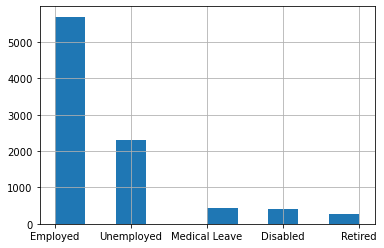

In [24]:
categorical_df['EmploymentStatus'].hist()

Here we can replace the smallest three to 'Unemployed'.

In [25]:
categorical_df['EmploymentStatus'] = categorical_df['EmploymentStatus'].replace({'Medical Leave':'Unemployed','Disabled':'Unemployed','Retired':'Unemployed'})

<AxesSubplot:>

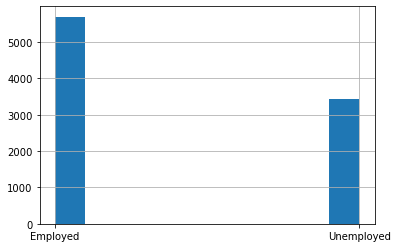

In [26]:
categorical_df['EmploymentStatus'].hist()

<AxesSubplot:>

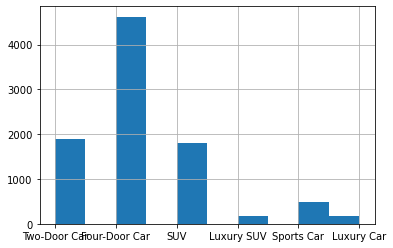

In [27]:
categorical_df['Vehicle Class'].hist()

In [28]:
categorical_df['Vehicle Class'].unique()

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury SUV', 'Sports Car',
       'Luxury Car'], dtype=object)

Here we can merge 'Luxury SUV', 'Sports Car', 'Luxury Car' and call them 'Luxury'.

In [29]:
categorical_df['Vehicle Class'] = categorical_df['Vehicle Class'].replace({'Sports Car':'Other','Luxury SUV':'Other','Luxury Car':'Other'})

<AxesSubplot:>

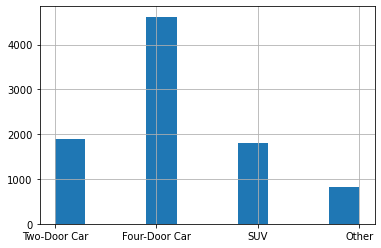

In [30]:
categorical_df['Vehicle Class'].hist()

In [ ]:
categorical_df['Marital Status'].hist()

Here we can change 'Divorced' to 'Single'.

In [ ]:
categorical_df['Marital Status'] = categorical_df['Marital Status'].replace({'Divorced':'Single'})

In [ ]:
categorical_df['Marital Status'].hist()

In [ ]:
categorical_df['Education'].hist()

Here we can merge 'Master' and 'Doctor' to 'Higher than Bachelor'.

In [ ]:
categorical_df['Education'] = categorical_df['Education'].replace({'Master':'Higher than Bachelor', 'Doctor':'Higher than Bachelor'})

In [ ]:
categorical_df['Education'].hist()